# Player Transfermrket Value Estimator 

## Preparation

### Imports and Data Load

Here, I'll be importing libraries and loading the file.

In [ ]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
from sklearn.model_selection import train_test_split
import xgboost as xgb
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/UT/Plan\ II\ \(General\)/Thesis/Model

/content/gdrive/MyDrive/UT/Plan II (General)/Thesis/Model


In [ ]:
raw = pd.read_csv('final_dataset.csv')

In [ ]:
display(raw.head())
print(f"Total number of rows: {raw.shape[0]}\nTotal number of columns: {raw.shape[1]}")

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/2

Total number of rows: 2075
Total number of columns: 143


### Cleaning

First going to take a look at the data.

In [ ]:
display(raw['Position'].value_counts())

Defender      728
midfield      595
attack        555
Goalkeeper    197
Name: Position, dtype: int64

In [ ]:
# Print all columns

for col in raw.columns:
  print(col)

Player
Club
Age
Position
Nation
Value
Contract Years Left
League
Squad (20/21)
MP (20/21)
Starts (20/21)
Min (20/21)
Total Mins/90 (20/21)
Gls (20/21)
Ast (20/21)
Non-Penalty Goals (20/21)
Penalties Scored (20/21)
Penalties Attempted (20/21)
Yellow Cards (20/21)
Red Cards (20/21)
Gls/90 (20/21)
Ast/90 (20/21)
(G+A)/90 (20/21)
Non-Penalty Goals/90 (20/21)
(Gls+Ast-Scored Penalties)/90 (20/21)
xG (20/21)
Non-Penalty xG (20/21)
xA (20/21)
Non-penalty xG+ xA (20/21)
xG/90 (20/21)
xA/90 (20/21)
(xG+xA)/90 (20/21)
Non-Penalty xG/90 (20/21)
(Non-Penalty xG+xA)/90 (20/21)
Total Shots (20/21)
Total Shots on Target (20/21)
Shots on Target% (20/21)
Shots/90 (20/21)
Shots on Target/90 (20/21)
Goals/Shots (20/21)
Goals/Shots on Target (20/21)
Avg Shot Distance (yds) (20/21)
Freekick Shots (20/21)
Non-Penalty xG/Shots (20/21)
Goals Scored minus xG (20/21)
Non-Penalty Goals Scored minus Non-Penalty xG (20/21)
Shot-Creating Actions (20/21)
Shot-Creating Actions/90 (20/21)
Passes Leading to Shot Attemp

Since there are not many (basically zero) stats for GKs, going to remove them from the dataset.

In [ ]:
outfield = raw[raw['Position']!='Goalkeeper']
display(outfield['Position'].value_counts())
print(f"Total number of rows: {outfield.shape[0]}\nTotal number of columns: {outfield.shape[1]}")

Defender    728
midfield    595
attack      555
Name: Position, dtype: int64

Total number of rows: 1878
Total number of columns: 143


Going to remove traits like Nationality and Club, and keep league, since league is more of an indicator of performance rather than a player's nationality or team (league will account for club).

In [ ]:
outfield = outfield.drop(columns=['Club', 'Squad (20/21)', 'Nation'])
display(outfield.head())

,Player,Age,Position,Value,Contract Years Left,League,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled +

Going to rename the positions.

In [ ]:
outfield['Position'] = outfield['Position'].replace('attack', 'F')
outfield['Position'] = outfield['Position'].replace('midfield', 'M')
outfield['Position'] = outfield['Position'].replace('Defender', 'D')
display(outfield.head())
print(outfield['Position'].value_counts())

,Player,Age,Position,Value,Contract Years Left,League,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled +

D    728
M    595
F    555
Name: Position, dtype: int64


Check on leagues to one-hot-encode.

In [ ]:
display(outfield['League'].value_counts())

Premier League    406
Serie A           398
La Liga           368
Bundesliga        360
Ligue 1           346
Name: League, dtype: int64

In [ ]:
dummy = pd.get_dummies(outfield.League, prefix='League')
print(dummy.head())

   League_Bundesliga  League_La Liga  League_Ligue 1  League_Premier League  \
0                  0               0               1                      0   
1                  1               0               0                      0   
2                  0               0               0                      1   
3                  0               0               0                      1   
4                  0               0               0                      1   

   League_Serie A  
0               0  
1               0  
2               0  
3               0  
4               0  


In [ ]:
outfield = pd.concat([outfield.drop('League', axis=1), pd.get_dummies(outfield['League'], prefix='League')], axis=1)
outfield.head()

,Player,Age,Position,Value,Contract Years Left,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total 

Now going to check for NaN values in the data

In [ ]:
outfield.isna().sum()

Player                                                                          0
Age                                                                             0
Position                                                                        0
Value                                                                           0
Contract Years Left                                                             0
MP (20/21)                                                                    132
Starts (20/21)                                                                132
Min (20/21)                                                                   132
Total Mins/90 (20/21)                                                         132
Gls (20/21)                                                                   132
Ast (20/21)                                                                   132
Non-Penalty Goals (20/21)                                                     132
Penalties Scored

If a player has NaN for matches played, we will remove their entire row from the dataset

In [ ]:
outfield = outfield[outfield['MP (20/21)'].notna()]

In [ ]:
outfield.isna().sum()

Player                                                                          0
Age                                                                             0
Position                                                                        0
Value                                                                           0
Contract Years Left                                                             0
MP (20/21)                                                                      0
Starts (20/21)                                                                  0
Min (20/21)                                                                     0
Total Mins/90 (20/21)                                                           0
Gls (20/21)                                                                     0
Ast (20/21)                                                                     0
Non-Penalty Goals (20/21)                                                       0
Penalties Scored

For remaining NaN, going to replace with 0s

In [ ]:
outfield = outfield.fillna(value=0)
outfield.isna().sum()

Player                                                                        0
Age                                                                           0
Position                                                                      0
Value                                                                         0
Contract Years Left                                                           0
MP (20/21)                                                                    0
Starts (20/21)                                                                0
Min (20/21)                                                                   0
Total Mins/90 (20/21)                                                         0
Gls (20/21)                                                                   0
Ast (20/21)                                                                   0
Non-Penalty Goals (20/21)                                                     0
Penalties Scored (20/21)                

Going to now one-hot encode the position as well, to make all features numeric.

In [ ]:
outfield = pd.concat([outfield.drop('Position', axis=1), pd.get_dummies(outfield['Position'], prefix='Position')], axis=1)
outfield.head()

,Player,Age,Value,Contract Years Left,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total Intercept

All features (besides name) are now numeric, and data is ready for EDA.

## EDA and Feature Selection

### EDA

Let's map the values to see if we need to log(transform) them later on.

(array([1.286e+03, 2.750e+02, 9.900e+01, 4.100e+01, 3.000e+01, 7.000e+00,
        5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([2.250000e+05, 1.460250e+07, 2.898000e+07, 4.335750e+07,
        5.773500e+07, 7.211250e+07, 8.649000e+07, 1.008675e+08,
        1.152450e+08, 1.296225e+08, 1.440000e+08]),
 <a list of 10 Patch objects>)

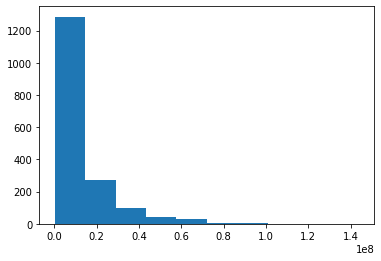

In [ ]:
plt.hist(outfield['Value'])

(array([ 22.,  76., 147., 256., 337., 329., 267., 204.,  93.,  15.]),
 array([12.32385568, 12.9700025 , 13.61614932, 14.26229613, 14.90844295,
        15.55458977, 16.20073659, 16.8468834 , 17.49303022, 18.13917704,
        18.78532386]),
 <a list of 10 Patch objects>)

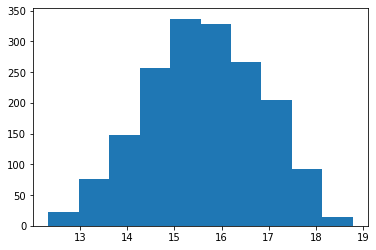

In [ ]:
plt.hist(np.log(outfield['Value']))

This data is much cleaner, and will probably have to use a log-transformation for final model.

Going to make a ton of scatter plots to see how variables correlate with value

In [ ]:
len(outfield.columns)

146

144 columns (excluding value and player name)

In [ ]:
col = outfield.columns.drop(['Value', 'Player'])
col

Index(['Age', 'Contract Years Left', 'MP (20/21)', 'Starts (20/21)',
       'Min (20/21)', 'Total Mins/90 (20/21)', 'Gls (20/21)', 'Ast (20/21)',
       'Non-Penalty Goals (20/21)', 'Penalties Scored (20/21)',
       ...
       'Aerial Duel Lost (20/21)', '% Aerial Duels Won (20/21)',
       'League_Bundesliga', 'League_La Liga', 'League_Ligue 1',
       'League_Premier League', 'League_Serie A', 'Position_D', 'Position_F',
       'Position_M'],
      dtype='object', length=144)

In [ ]:
#pp = sns.pairplot(data=outfield, y_vars=col,x_vars='Value')

Not immediately clear if there are any featuers that show a strong correlation. Let's try with log(transformation) of values.

In [ ]:
#outfield['Log Value'] = np.log(outfield['Value'])

#pp = sns.pairplot(data=outfield, y_vars=col, x_vars=['Log Value'])

#outfield = outfield.drop('Log Value', 1)

The variables show much more correlation with log(transform).

### Feature Selection

Now going to create a heatmap to see if I should eliminate some features from the model.

In [ ]:
outfield['Contract Years Left'] = pd.to_numeric(outfield['Contract Years Left'], errors='coerce')
outfield['Log Value'] = np.log(outfield['Value'])

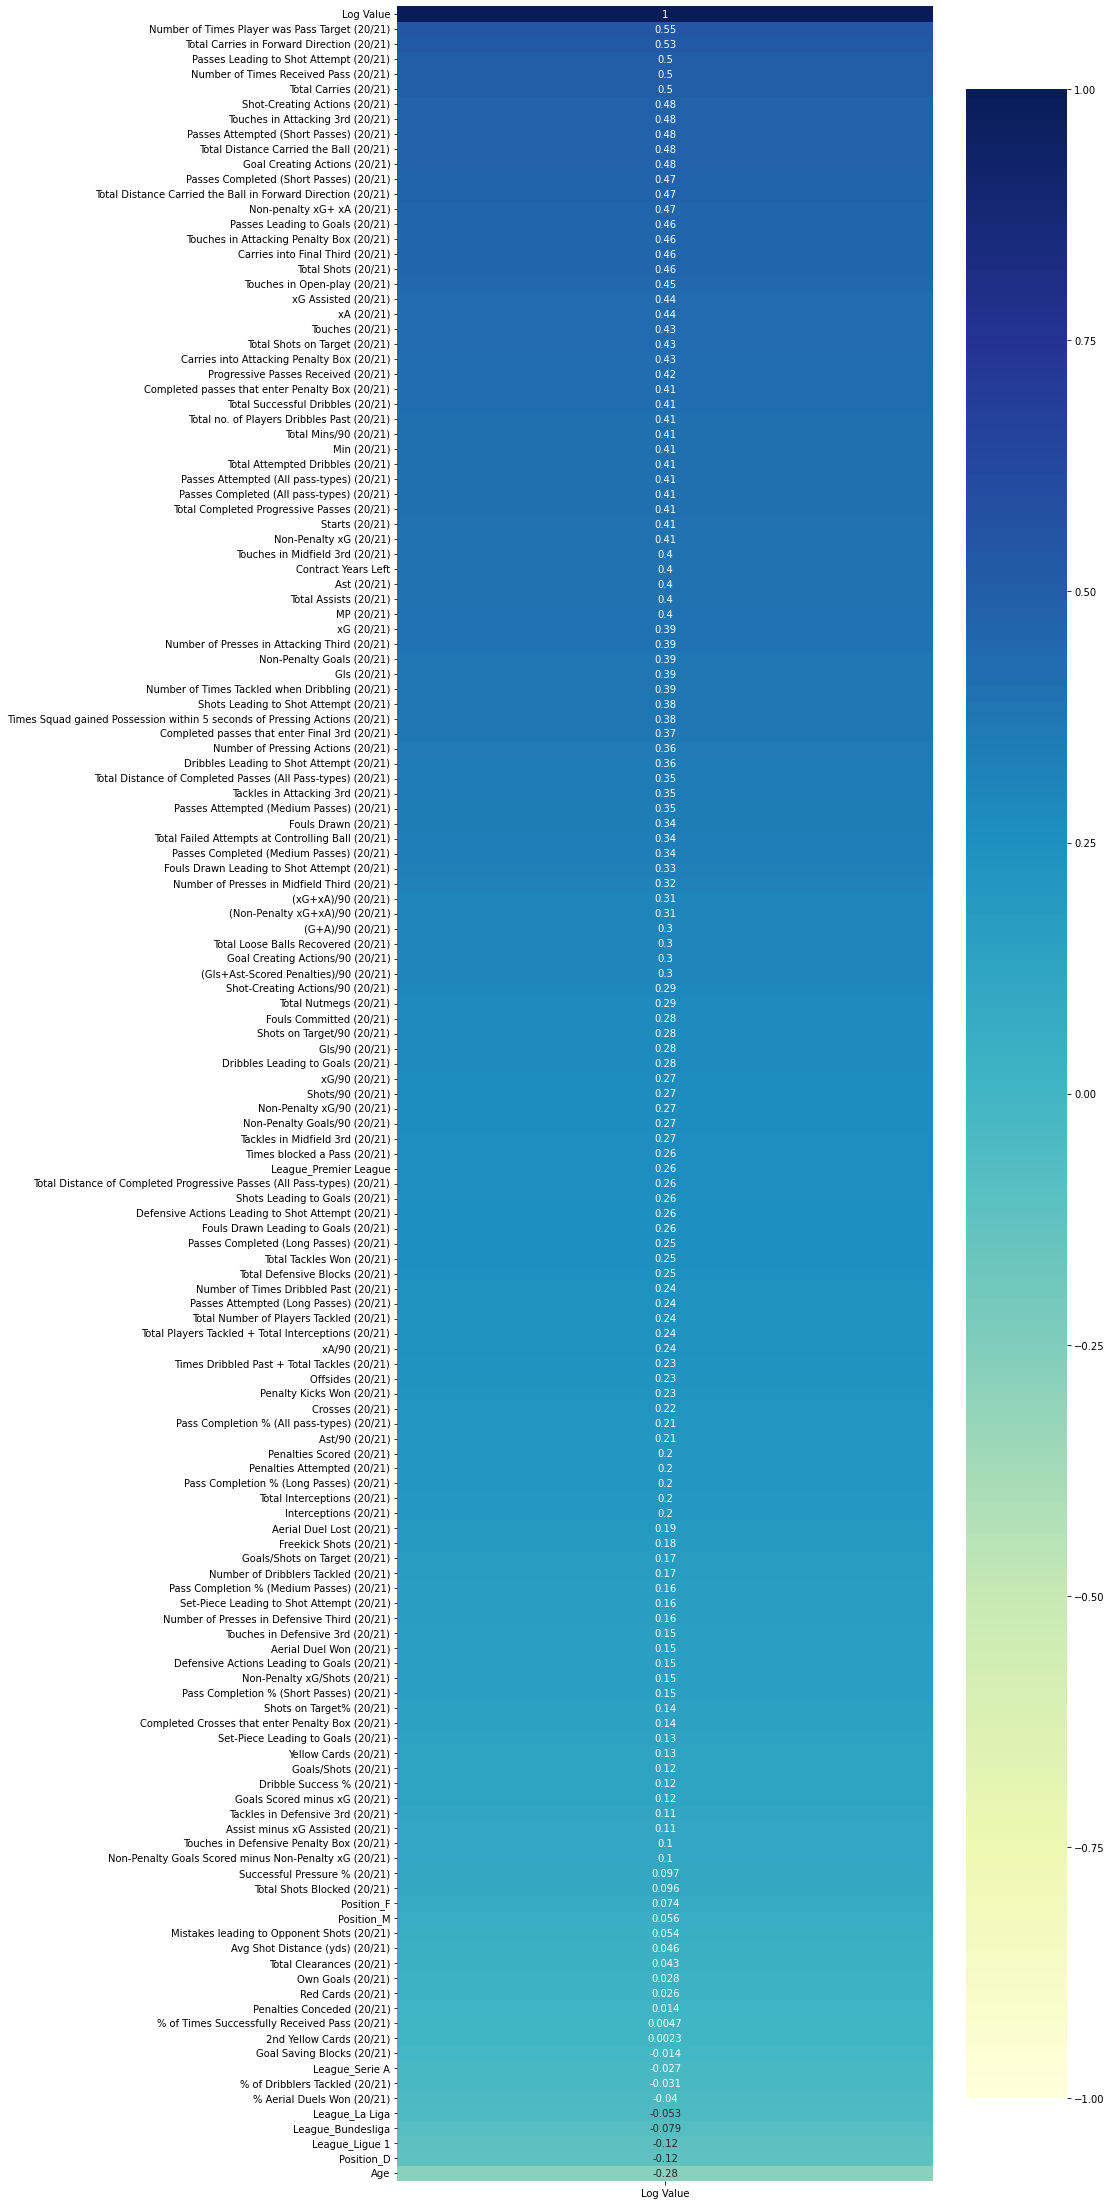

In [ ]:
temp = outfield.loc[:, outfield.columns != 'Player']
temp = temp.loc[:, temp.columns != 'Value']

fig, ax = plt.subplots(figsize=(12, 40))
sns.heatmap(temp.corr()[['Log Value']].sort_values('Log Value'),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

Going to run base models (no tuning) for the following sets of features:



*   All features
*   Best 110
*   Best 80
*   Best 50
*   Best 20



The 'Best' features are going to be calculated using the SelectKBest function of Sci-kit learn. Will be using Log_Value as target.

In [ ]:
# Create copy of DF with all features, but without player name, value, and contract years left

all_features = outfield.copy()
all_features = all_features.drop(columns=['Player', 'Value', 'Contract Years Left'])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# Get Best 110 features

select_oneten = SelectKBest(score_func=f_regression, k = 110)
oneten = select_oneten.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_oneten.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 110 features: {feats[filter]}')

oneten_features = all_features.copy()
oneten_features.drop(oneten_features.columns.difference(feats[filter]), 1, inplace=True)
oneten_features['Log Value'] = all_features['Log Value'].copy()

Selected best 110 features: ['Age' 'MP (20/21)' 'Starts (20/21)' 'Min (20/21)' 'Total Mins/90 (20/21)'
 'Gls (20/21)' 'Ast (20/21)' 'Non-Penalty Goals (20/21)'
 'Penalties Scored (20/21)' 'Penalties Attempted (20/21)' 'Gls/90 (20/21)'
 'Ast/90 (20/21)' '(G+A)/90 (20/21)' 'Non-Penalty Goals/90 (20/21)'
 '(Gls+Ast-Scored Penalties)/90 (20/21)' 'xG (20/21)'
 'Non-Penalty xG (20/21)' 'xA (20/21)' 'Non-penalty xG+ xA (20/21)'
 'xG/90 (20/21)' 'xA/90 (20/21)' '(xG+xA)/90 (20/21)'
 'Non-Penalty xG/90 (20/21)' '(Non-Penalty xG+xA)/90 (20/21)'
 'Total Shots (20/21)' 'Total Shots on Target (20/21)' 'Shots/90 (20/21)'
 'Shots on Target/90 (20/21)' 'Goals/Shots on Target (20/21)'
 'Freekick Shots (20/21)' 'Shot-Creating Actions (20/21)'
 'Shot-Creating Actions/90 (20/21)'
 'Passes Leading to Shot Attempt (20/21)'
 'Set-Piece Leading to Shot Attempt (20/21)'
 'Dribbles Leading to Shot Attempt (20/21)'
 'Shots Leading to Shot Attempt (20/21)'
 'Fouls Drawn Leading to Shot Attempt (20/21)'
 'Defensiv

In [ ]:
# Get Best 80 features

select_eighty = SelectKBest(score_func=f_regression, k = 80)
eighty = select_eighty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_eighty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 80 features: {feats[filter]}')

eighty_features = all_features.copy()
eighty_features.drop(eighty_features.columns.difference(feats[filter]), 1, inplace=True)
eighty_features['Log Value'] = all_features['Log Value'].copy()

Selected best 80 features: ['Age' 'MP (20/21)' 'Starts (20/21)' 'Min (20/21)' 'Total Mins/90 (20/21)'
 'Gls (20/21)' 'Ast (20/21)' 'Non-Penalty Goals (20/21)' 'Gls/90 (20/21)'
 '(G+A)/90 (20/21)' 'Non-Penalty Goals/90 (20/21)'
 '(Gls+Ast-Scored Penalties)/90 (20/21)' 'xG (20/21)'
 'Non-Penalty xG (20/21)' 'xA (20/21)' 'Non-penalty xG+ xA (20/21)'
 'xG/90 (20/21)' '(xG+xA)/90 (20/21)' 'Non-Penalty xG/90 (20/21)'
 '(Non-Penalty xG+xA)/90 (20/21)' 'Total Shots (20/21)'
 'Total Shots on Target (20/21)' 'Shots/90 (20/21)'
 'Shots on Target/90 (20/21)' 'Shot-Creating Actions (20/21)'
 'Shot-Creating Actions/90 (20/21)'
 'Passes Leading to Shot Attempt (20/21)'
 'Dribbles Leading to Shot Attempt (20/21)'
 'Shots Leading to Shot Attempt (20/21)'
 'Fouls Drawn Leading to Shot Attempt (20/21)'
 'Defensive Actions Leading to Shot Attempt (20/21)'
 'Goal Creating Actions (20/21)' 'Goal Creating Actions/90 (20/21)'
 'Passes Leading to Goals (20/21)' 'Dribbles Leading to Goals (20/21)'
 'Shots Leadi

In [ ]:
# Get Best 50 features

select_fifty = SelectKBest(score_func=f_regression, k = 50)
fifty = select_fifty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_fifty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 50 features: {feats[filter]}')

fifty_features = all_features.copy()
fifty_features.drop(fifty_features.columns.difference(feats[filter]), 1, inplace=True)
fifty_features['Log Value'] = all_features['Log Value'].copy()

Selected best 50 features: ['MP (20/21)' 'Starts (20/21)' 'Min (20/21)' 'Total Mins/90 (20/21)'
 'Gls (20/21)' 'Ast (20/21)' 'Non-Penalty Goals (20/21)' 'xG (20/21)'
 'Non-Penalty xG (20/21)' 'xA (20/21)' 'Non-penalty xG+ xA (20/21)'
 'Total Shots (20/21)' 'Total Shots on Target (20/21)'
 'Shot-Creating Actions (20/21)' 'Passes Leading to Shot Attempt (20/21)'
 'Dribbles Leading to Shot Attempt (20/21)'
 'Shots Leading to Shot Attempt (20/21)' 'Goal Creating Actions (20/21)'
 'Passes Leading to Goals (20/21)' 'Touches (20/21)'
 'Touches in Midfield 3rd (20/21)' 'Touches in Attacking 3rd (20/21)'
 'Touches in Attacking Penalty Box (20/21)' 'Touches in Open-play (20/21)'
 'Total Successful Dribbles (20/21)' 'Total Attempted Dribbles (20/21)'
 'Total no. of Players Dribbles Past (20/21)' 'Total Carries (20/21)'
 'Total Distance Carried the Ball (20/21)'
 'Total Distance Carried the Ball in Forward Direction (20/21)'
 'Total Carries in Forward Direction (20/21)'
 'Carries into Final Third 

In [ ]:
# Get Best 20 features

select_twenty = SelectKBest(score_func=f_regression, k = 20)
fifty = select_twenty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_twenty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 20 features: {feats[filter]}')

twenty_features = all_features.copy()
twenty_features.drop(twenty_features.columns.difference(feats[filter]), 1, inplace=True)
twenty_features['Log Value'] = all_features['Log Value'].copy()

Selected best 20 features: ['xA (20/21)' 'Non-penalty xG+ xA (20/21)' 'Total Shots (20/21)'
 'Shot-Creating Actions (20/21)' 'Passes Leading to Shot Attempt (20/21)'
 'Goal Creating Actions (20/21)' 'Passes Leading to Goals (20/21)'
 'Touches in Attacking 3rd (20/21)'
 'Touches in Attacking Penalty Box (20/21)' 'Touches in Open-play (20/21)'
 'Total Carries (20/21)' 'Total Distance Carried the Ball (20/21)'
 'Total Distance Carried the Ball in Forward Direction (20/21)'
 'Total Carries in Forward Direction (20/21)'
 'Carries into Final Third (20/21)'
 'Number of Times Player was Pass Target (20/21)'
 'Number of Times Received Pass (20/21)'
 'Passes Completed (Short Passes) (20/21)'
 'Passes Attempted (Short Passes) (20/21)' 'xG Assisted (20/21)']


Now have five dataframes, each containing a different # of features.

In [ ]:
print('All Features')
display(all_features.head())

print('110 Features')
display(oneten_features.head())

print('80 Features')
display(eighty_features.head())

print('50 Features')
display(fifty_features.head())

print('20 Features')
display(twenty_features.head())

All Features


,Age,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total Interceptions (20/21),Total Clearances (20

110 Features


,Age,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots on Target (20/21),Freekick Shots (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total Interceptions (20/21),Fouls Committed (20/21),Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),League_Premier League,Log Value
0,22,31.0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,1.02,0.26,1.29,0.79,1.06,24.6,20.1,4.6,24.7,0.93,0.17,1.11,0.76,0.93,98.0,47.0,3.71,1.78,0.45,2.0,107.0,4.05,69.0,0.0,19.0,7.0,10.0,2.0,28.0,1.06,13.0,7.0,2.0,5.0,1.0,1442.0,59.0,493.0,1021.0,277.0,1386.0,88.0,189.0,98.0,15.0,1163.0,6385.0,4313.0,261.0,72.0,69.0,72.0,65.0,1616.0,1221.0,322.0,812.0,1033.0,78.6,11138.0,2052.0,519.0,618.0,232.0,279.0,83.2,32.0,59.0,54.2,7.0,4.6,

80 Features


,Age,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Gls/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Touches (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Times blocked a Pass (20/21),Fouls Committed (20/21),Fouls Drawn (20/21),Total Loose Balls Recovered (20/21),League_Premier League,Log Value
0,22,31.0,27.0,2380.0,26.4,27.0,7.0,21.0,1.02,1.29,0.79,1.06,24.6,20.1,4.6,24.7,0.93,1.11,0.76,0.93,98.0,47.0,3.71,1.78,107.0,4.05,69.0,19.0,7.0,10.0,2.0,28.0,1.06,13.0,7.0,2.0,1442.0,493.0,1021.0,277.0,1386.0,88.0,189.0,98.0,15.0,1163.0,6385.0,4313.0,261.0,72.0,69.0,72.0,65.0,1616.0,1221.0,322.0,812.0,1033.0,11138.0,2052.0,519.0,618.0,232.0,279.0,7.0,4.6,37.0,36.0,61.0,1.0,5.0,183.0,57.0,52.0,124.0,11.0,23.0,38.0,109.0,0,18.785324
1,21,28.0,27.0,2407.0,26.7,27.0,6.0,25.0,1.01,1.23,0.93,1.16,23.7,20.5,5.4,25.9,0.89,1.09,0.77,0.97,90.0,47.0,3.37,1.76,62.0,2.32,39.0,10.0,9.0,3.0,1.0,16.0,0.60,10.0,4.0,2.0,762.0,319.0,444.0,190.0,716.0,28.0,43.0,29.0,0.0,461.0,2326.0,1364.0,79.0,27.0,23.0,56.0,23.0,1100.0,548.0,222.0,360.0,490.0,4932.0,811.0,222.0,286.0,99.0,135.0,6.0,5.4,17.0,17.0,32.0,2.0,3.0,320.0,105.0,90.0,222.0,11.0,21.0,22.0,96.0,0,18.577684
2,28,35.0,35.0,3082.0,34.2,23.0,14.0,19.0,0.67,1.08,0.55,0.96,20.5,17.5,7.4,24.8,0.60,0.81,0.51,0.73,134.0,47.0,3.91,1.37,113.0,3.30,70.0,18.0,9.0,12.0,2.0,25.0,0.73,15.0,6.0,0.0,1396.0,736.0,616.0,166.0,1341.0,46.0,79.0,47.0,8.0,897.0,4616.0,2537.0,150.0,53.0,26.0,61.0,71.0,1761.0,1055.0,223.0,657.0,937.0,12519.0,3835.0,300.0,385.0,236.0,316.0,14.0,7.4,98.0,41.0,125.0,12.0,3.0,391.0,99.0,190.0,180.0,17.0,26.0,60.0,155.0,1,18.497642
3,21,26.0,24.0,2062.0,22.9,8.0,11.0,7.0,0.35,0.83,0.31,0.79,7.4,6.6,6.8,13.4,0.32,0.62,0.29,0.5

50 Features


,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shot-Creating Actions (20/21),Passes Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Passes Leading to Goals (20/21),Touches (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Total no. of Players Dribbles Past (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Number of Presses in Attacking Third (20/21),Log Value
0,31.0,27.0,2380.0,26.4,27.0,7.0,21.0,24.6,20.1,4.6,24.7,98.0,47.0,107.0,69.0,19.0,7.0,28.0,13.0,1442.0,493.0,1021.0,277.0,1386.0,88.0,189.0,98.0,1163.0,6385.0,4313.0,261.0,72.0,69.0,65.0,1616.0,1221.0,322.0,812.0,1033.0,11138.0,519.0,618.0,7.0,4.6,37.0,36.0,61.0,183.0,57.0,124.0,18.785324
1,28.0,27.0,2407.0,26.7,27.0,6.0,25.0,23.7,20.5,5.4,25.9,90.0,47.0,62.0,39.0,10.0,9.0,16.0,10.0,762.0,319.0,444.0,190.0,716.0,28.0,43.0,29.0,461.0,2326.0,1364.0,79.0,27.0,23.0,23.0,1100.0,548.0,222.0,360.0,490.0,4932.0,222.0,286.0,6.0,5.4,17.0,17.0,32.0,320.0,105.0,222.0,18.577684
2,35.0,35.0,3082.0,34.2,23.0,14.0,19.0,20.5,17.5,7.4,24.8,134.0,47.0,113.0,70.0,18.0,9.0,25.0,15.0,1396.0,736.0,616.0,166.0,1341.0,46.0,79.0,47.0,897.0,4616.0,2537.0,150.0,53.0,26.0,71.0,1761.0,1055.0,223.0,657.0,937.0,12519.0,300.0,385.0,14.0,7.4,98.0,41.0,125.0,391.0,99.0,180.0,18.497642
3,26.0,24.0,2062.0,22.9,8.0,11.0,7.0,7.4,6.6,6.8,13.4,51.0,15.0,125.0,87.0,11.0,3.0,22.0,17.0,1791.0,721.0,1064.0,134.0,1653.0,91.0,163.0,96.0,1412.0,7503.0,4320.0,239.0,81.0,51.0,41.0,1693.0,1403.0,218.0,1160.0,1474.0,17976.0,655.0,754.0,11.0,6.8,56.0,82.0,148.0,255.0,93.0,112.0,18.315320
4,37.0,34.0,3078.0,34.2,22.0,5.0,16.0,20.9,16.4,6.3,22.6,120.0,46.0,117.0,87.0,6.0,12.0,14.0,10.0,1758.0,621.0,1162.0,313.0,1724.0,50.0,98.0,56.0,1367.0,6332.0,3460.0,218.0,52.0,54.0,92.0,2137.0,1444.0,415.0,1071.0,1288.0,16219.0,632.0,696.0,5.0,6.3,61.0,74.0,137.0,553.0,153.0,343.0,18.315320


20 Features


,xA (20/21),Non-penalty xG+ xA (20/21),Total Shots (20/21),Shot-Creating Actions (20/21),Passes Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Passes Leading to Goals (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),xG Assisted (20/21),Log Value
0,4.6,24.7,98.0,107.0,69.0,28.0,13.0,1021.0,277.0,1386.0,1163.0,6385.0,4313.0,261.0,72.0,1616.0,1221.0,519.0,618.0,4.6,18.785324
1,5.4,25.9,90.0,62.0,39.0,16.0,10.0,444.0,190.0,716.0,461.0,2326.0,1364.0,79.0,27.0,1100.0,548.0,222.0,286.0,5.4,18.577684
2,7.4,24.8,134.0,113.0,70.0,25.0,15.0,616.0,166.0,1341.0,897.0,4616.0,2537.0,150.0,53.0,1761.0,1055.0,300.0,385.0,7.4,18.497642
3,6.8,13.4,51.0,125.0,87.0,22.0,17.0,1064.0,134.0,1653.0,1412.0,7503.0,4320.0,239.0,81.0,1693.0,1403.0,655.0,754.0,6.8,18.315320
4,6.3,22.6,120.0,117.0,87.0,14.0,10.0,1162.0,313.0,1724.0,1367.0,6332.0,3460.0,218.0,52.0,2137.0,1444.0,632.0,696.0,6.3,18.315320


In [ ]:
all_features.to_csv('all_features.csv', encoding='utf-8', index=False)
oneten_features.to_csv('oneten_features.csv', encoding='utf-8', index=False)
eighty_features.to_csv('eighty_features.csv', encoding='utf-8', index=False)
fifty_features.to_csv('fifty_features.csv', encoding='utf-8', index=False)
twenty_features.to_csv('twenty_features.csv', encoding='utf-8', index=False)